<a href="https://colab.research.google.com/github/Premlatasharma221/ML_Project/blob/main/Breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf ## ann
from tensorflow import keras



In [3]:
dataset = sklearn.datasets.load_breast_cancer()


In [4]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
data_frame =  pd.DataFrame(dataset.data , columns = dataset.feature_names)

In [6]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
data_frame['label'] = dataset.target

In [9]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
data_frame.shape

(569, 31)

In [11]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [13]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [14]:
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [15]:
data_frame.groupby('label').mean(

)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [16]:
x = data_frame.drop(columns='label', axis=1)
y = data_frame['label']

In [17]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [20]:

x.shape

(569, 30)

In [21]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [22]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)



In [23]:
x_train_std

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [24]:
y.shape,y_train.shape,y_test.shape

((569,), (455,), (114,))

In [25]:
tf.random.set_seed(3)

In [26]:
## setting up the layers of nn
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),##  covert each features in one dimension
    keras.layers.Dense(20,activation = 'relu'),

    keras.layers.Dense(2,activation= 'sigmoid')


])

In [27]:
## compiling the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [28]:
# train the model
history = model.fit(x_train_std,y_train,validation_split=0.1,epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 21ms/step - loss: 1.4705 - accuracy: 0.1565 - val_loss: 1.0957 - val_accuracy: 0.1087
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.9768 - accuracy: 0.3399 - val_loss: 0.7268 - val_accuracy: 0.5000
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6545 - accuracy: 0.6308 - val_loss: 0.5194 - val_accuracy: 0.8043
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.8020 - val_loss: 0.3988 - val_accuracy: 0.8696
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8704 - val_loss: 0.3212 - val_accuracy: 0.8913
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.3081 - accuracy: 0.8998 - val_loss: 0.2692 - val_accuracy: 0.9130
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.2607 - accuracy: 0.9144 - val_loss: 0.2337 - val_accuracy: 0.9130
Epoch 8/20
13/13 [=

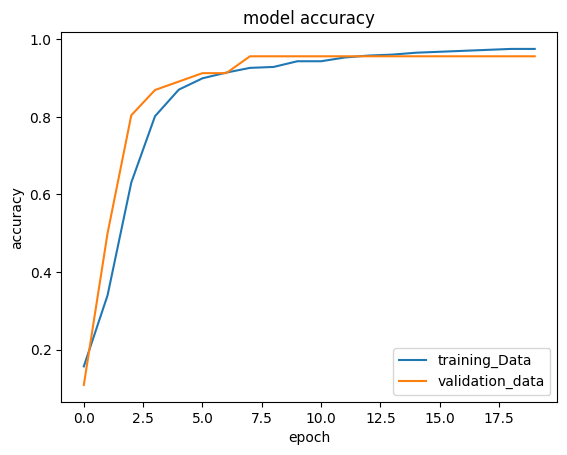

In [29]:
## visualizing the accuracy and  loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_Data','validation_data'],loc = 'lower right')
plt.show()

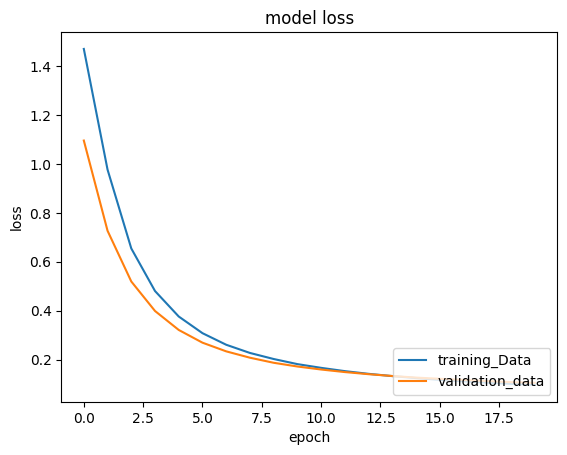

In [30]:
## visualizing the accuracy and  loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_Data','validation_data'],loc = 'lower right')
plt.show()

In [31]:
# Accuracy of the model on test data
loss,accuracy = model.evaluate(x_test_std,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.9561


In [32]:
print("loss",loss)
print('accuracy',accuracy)

loss 0.11030655354261398
accuracy 0.9561403393745422


In [33]:
print(x_test_std.shape)
print(x_test_std[0])


(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [34]:
y_pred = model.predict(x_test_std)

4/4 [==============================] - 0s 3ms/step


In [35]:
y_pred

array([[0.04449058, 0.46195573],
       [0.46590346, 0.5000204 ],
       [0.00457014, 0.59348166],
       [0.999981  , 0.10787938],
       [0.38578835, 0.5926713 ],
       [0.9982259 , 0.08114967],
       [0.07963519, 0.434361  ],
       [0.02071412, 0.68791723],
       [0.0396709 , 0.68953884],
       [0.05436016, 0.7358738 ],
       [0.309012  , 0.31326082],
       [0.03710523, 0.5971167 ],
       [0.04308343, 0.341736  ],
       [0.13613151, 0.5161026 ],
       [0.0260904 , 0.55100936],
       [0.981403  , 0.5776842 ],
       [0.01345239, 0.67532974],
       [0.01423517, 0.550587  ],
       [0.01348383, 0.6877207 ],
       [0.98902875, 0.05922415],
       [0.02302915, 0.4309209 ],
       [0.01395601, 0.73913324],
       [0.03362646, 0.6915972 ],
       [0.0142078 , 0.7271071 ],
       [0.14547645, 0.5964112 ],
       [0.98031425, 0.1749534 ],
       [0.11445382, 0.56139606],
       [0.3228364 , 0.5406775 ],
       [0.973727  , 0.34983626],
       [0.9842026 , 0.23409621],
       [0.

In [36]:
print(y_pred.shape)

(114, 2)


In [37]:
print(y_pred[0]) ## basically it's giving me the probability of 0 and 1

[0.04449058 0.46195573]


In [38]:

## converting the prediction probability  in class labels


In [39]:
# argmax functions
my_list = [10,20,30]

index_of_max_val=np.argmax(my_list)
print(my_list)
print(index_of_max_val)

[10, 20, 30]
2


In [40]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [41]:
y_pred_labels

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0]

 # building the predictive system

In [47]:
input_data = (19.17,24.8,132.4,1123,0.0974,0.2458,0.2065,0.1118,0.2397,0.078,0.9555,3.568,11.07,116.2,0.003139,0.08297,0.0889,0.0409,0.04484,0.01284,20.96,29.94,151.7,1332,0.1037,0.3903,0.3639,0.1767,0.3176,0.1023)
# change the input data to a numpy array
input_to_numpy = np.asarray(input_data)

#reshape the numpy array as we are predicting for one data point
input_to_numpy = input_to_numpy.reshape(1,-1)

#standard the data
std_data = scaler.transform(input_to_numpy)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

prediction_label  = [np.argmax(prediction)]

print(prediction_label)


if(prediction_label[0]==0):
  print("The tumor is Malignant")
else:
    print("The tumor is bengin")









[[ 1.44471168  1.23921737  1.67631248  1.3346513   0.096064    2.73063502
   1.5498964   1.65480412  2.21131609  2.2171078   1.99786942  4.35159434
   4.03623747  1.64767201 -1.27307348  3.28243031  2.21770842  5.00387735
   3.03846913  3.78571591  1.00750415  0.66765872  1.36703618  0.83651182
  -1.21049178  0.87981831  0.45685303  0.96596743  0.46833242  1.02208701]]
1/1 [==============================] - 0s 27ms/step
[[0.99430984 0.55157626]]
[0]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
